# SEM Particle Analysis
The SEM is capable to perform an automated particle analysis during which a number of micrographs are collected. Each micrograph is processed during which particles are identified if a cluster of pixels exceeds a threshold intensity. When a particle is identified, some basic morphological data is extracted (such as the mean diameter and aspect ratio) and an EDX spot measurement is performed. 

During a measurement, a number of *stubs* can be analyzed, generally each stub corresponds to a different sample. Using this document, various functions can be executed to anayze and process the data. The following functions are available:
- [Data import](#Data-import): Imports the data for future use (required)
- [Snapshots](#Snapshots): Combined micrographs of all particles into a single image.
- [EDX spectra](#EDX-spectra): Import EDX spectra into the dataframe.
- [Particle classification](#Particle-classification): Classify the particles based on various properties.
- [Inter-particle distance](#Inter-particle-distance): Calculates for each particle the distance to its nearest-neighbor.
- [Bokeh graphs](#Bokeh-graphs): Prepares various interactive plots of the data.

## Preparation
Before any function can be executed, some global variables need to be set up. The following variables are mandatory:
- ***directory*** : The directory holding the particle analysis. The main directory should be selected.
- ***stub*** : The stub number to be analyzed.

In [16]:
directory = "F:\\PA_UC\\"
stub = 5

## Data import
Import the produced data into a dataframe which can be used for the various function.
 Uses the calculations described in the [ImportData](ImportData.ipynb) notebook.

In [17]:
%run ./ImportData.ipynb

File: F:\PA_UC\pa_uc.csv
Date: 13.12.2016
Voltage: 10.0 kV
Magnification: 2500x
Measurement time: 30.0 s
Number of columns: 28
Number of particles: 3639
Particles on stub 5: 86


## Snapshots
Crop he recorded images to make a single compilation of all particles. Before the image can be prepared, the data should be imported and two variables need to be defined:
- ***CROP_SIZE*** : Size of the cropped images, in pixels and should be an even integer number.
- *directory* : The directory holding the particle analysis. The main directory should be selected.
- *stub* : The stub number to be analyzed.
- *data* : Dataframe containing the measurement data (required columns: *fieldnum*, *X_cent*, *Y_cent*).

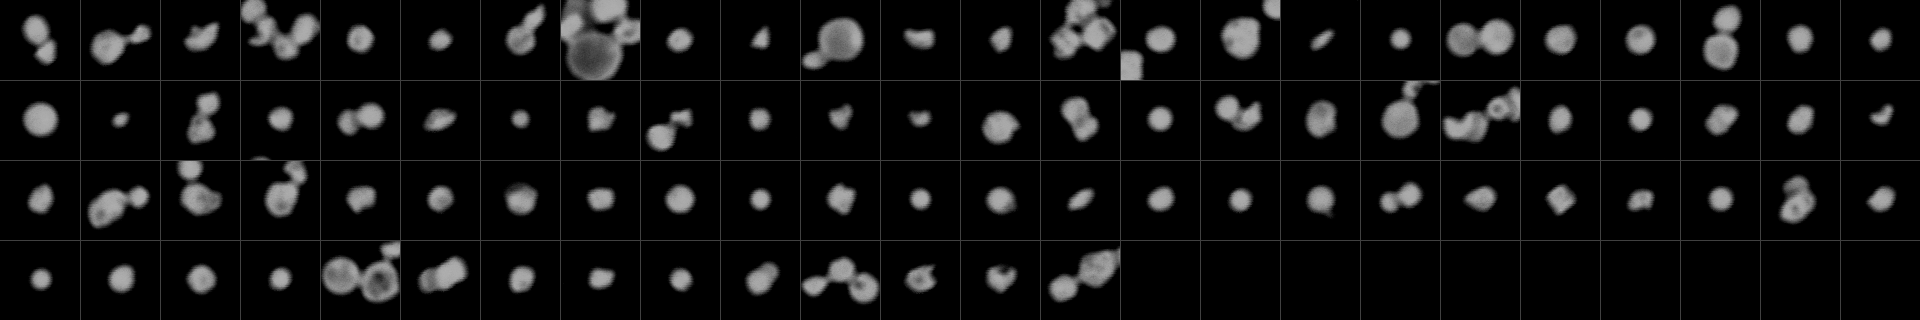

In [18]:
CROP_SIZE = 80
%run ./ImageStitching.ipynb
display.Image(filename=FileImage)

## EDX spectra
For each particle, an EDX spot measurement is performed. The collected spectra is used to quantify the weight fraction of some selected elements, but elements not selected beforehand are not considered. Therefore, the collected EDX spectra are loaded into the *data* dataframe. Optionally, the loaded spectra could be saved in a single *csv*, although this function is very slow when a large number of spectra have been imported.

The SEM has a function to measure only a limited number of particles, which can save valuable measurement time. However, for each particle a value is added to the *EDX* column; for particles without EDX measurement this array contains only zeros.

The following variables are required:
- ***EDX_save*** : Boolean whether to save the spectra in a *csv* file (*True* or *False*).
- ***EDX_channels*** : Total number of EDX channels to be imported, less saves memory (≤ 2086).
- *directory* : The directory holding the particle analysis. The main directory should be selected.
- *stub* : The stub number to be analyzed.
- *data* : Dataframe containing the measurement data (required columns: *fieldnum*).

In [19]:
EDX_save = False
EDX_channels = 2086
%run ./EDXProcess.ipynb

Number of EDX spectra: 86


## Particle classification
Particles can be classified based on various categories, such as chemical composition (based on EDX data) and morphology. A number of classification functions have been performed, which are:
- ...

0: 0.0 particles with no EDX data
1: 86.0 uranium particles
2: 0.0 non-uranium particles


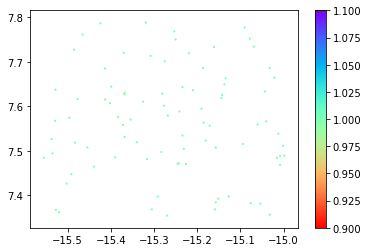

In [20]:
%run ./ParticleClassification.ipynb

## Inter-particle distance
For each particle, the distance to the closest neighbor is calculated.

The following variables are required:
- ***dist_required*** : Minimal inter-particle distance required, in um.
- *data* : Dataframe containing the measurement data (required columns: *X*, *Y*).

In [21]:
dist_required = 75
%run ./InterparticleDistance.ipynb

Median interparticle distance: 24.7983738762 um
Fraction of particles further than 75 um apart: 0.0%


## Bokeh graphs
The package Bokeh can be used to produce interactive graphs to visualize the data. Various columns from the *data* dataframe are plotted in a number of graphs:

- Particle distribution: Distribution of the particles over the substrate
- Particle morphology: Plot of the particle diameter against the aspect ratio
- Chemical composition: Plot containing two elements quantified during the EDX measurement

However, when a large number of particles have been imported, the graphs could cause this document to respond very slow or even cause a crash of the browser. Therefore, the graphs can be disabled, using the *DISABLE_BOKEH* variable. The following variables need to be set:

- ***DISABLE_BOKEH*** : Disables the generation of Bokeh plots (*True* or *False*).
- *data* : Dataframe containing the measurement data (required columns: *fieldnum*).

In [22]:
DISABLE_BOKEH = False
%run ./BokehGraphs.ipynb

Loading BokehJS ...